**Description**: Analyze accuracies for $m = 50, n = 500$.

**Estimated runtime**: ~1 hour. (Multi-core isn't working on my machine. Set `cores=4`
in the `model.fit` call if it works for you.)

In [1]:
import os
import sys
from typing import Literal

import seaborn as sns

# sys hack to import from grandparent
sys.path.append(os.path.abspath(os.path.join('..', '..')))
import utils

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
num_train: Literal[50, 100] = 50
num_test: Literal[50, 100, 200, 500] = 500

In [3]:
sns.set_theme(style="darkgrid")

# Load data

In [4]:
accuracies_home_dir = os.path.join("..", "..", "accuracies_from_paper")
accuracy_df = utils.load_all_accuracies(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for plot
num_correct_df = utils.load_all_num_correct(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for model

In [5]:
equation = "p(num_correct, num_test) ~ method + lm_type + (1|dataset/pair)"
id_vars = ["num_test", "pair", "lm_type", "dataset"]

# Plot

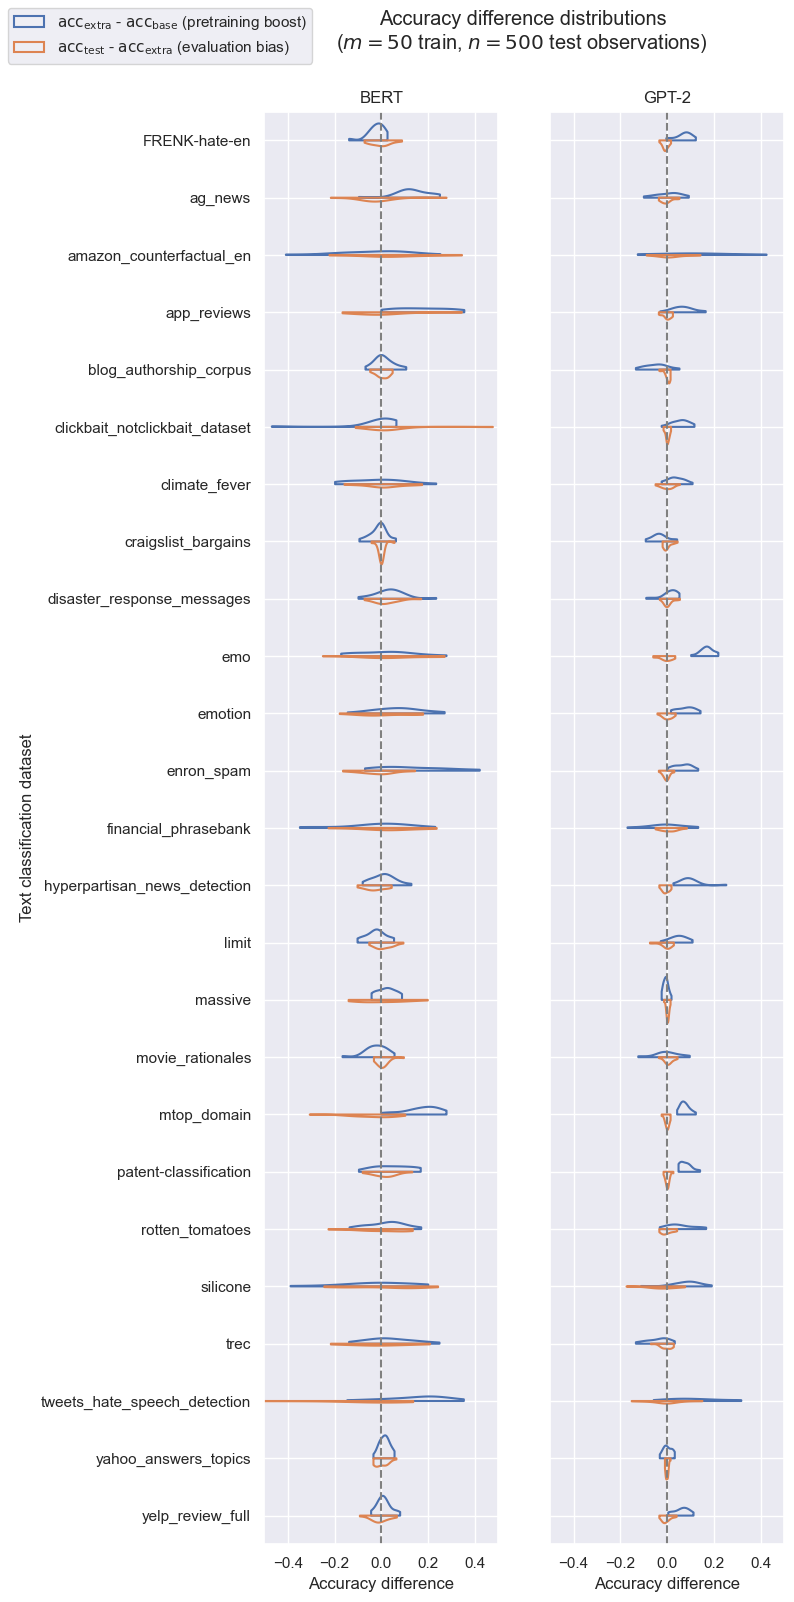

In [6]:
utils.violin_plot_multiple_lms(accuracy_df, num_test, num_train)

# Control

In [7]:
summary_control, summary_relative_control = utils.eda(
    accuracy_df, treatment="extra", control="base"
)

Overall difference:
┌─────────┬──────────┐
│ mean    ┆ se       │
╞═════════╪══════════╡
│ 0.04061 ┆ 0.009036 │
└─────────┴──────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.198619 ┆ 0.056562 │
└──────────┴──────────┘


In [8]:
summary_control

dataset,mean,se
"""FRENK-hate-en""",0.0231,0.012982
"""ag_news""",0.06895,0.02067
"""amazon_counter…",0.0442,0.037464
"""app_reviews""",0.11885,0.022614
"""blog_authorshi…",-0.01795,0.011856
…,…,…
"""silicone""",0.0334,0.027857
"""trec""",-0.00185,0.019442
"""tweets_hate_sp…",0.1337,0.026855
"""yahoo_answers_…",0.00785,0.004806


In [9]:
summary_relative_control

dataset,mean,se
"""FRENK-hate-en""",0.054106,0.025283
"""ag_news""",0.127452,0.04223
"""amazon_counter…",0.122994,0.077511
"""app_reviews""",0.932929,0.193199
"""blog_authorshi…",-0.029187,0.022639
…,…,…
"""silicone""",0.139717,0.067943
"""trec""",0.034178,0.091192
"""tweets_hate_sp…",0.272451,0.058745
"""yahoo_answers_…",0.090332,0.048601


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, lm_type, 1|dataset_sigma, 1|dataset_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 997 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Sampling posterior predictive. This will take at least 30 min. Maybe 1 hrs for this size data


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
method[extra],0.21538,0.0046,0.20794,0.22248,0.00006,0.00004,6327.80407,2655.50293,1.00252


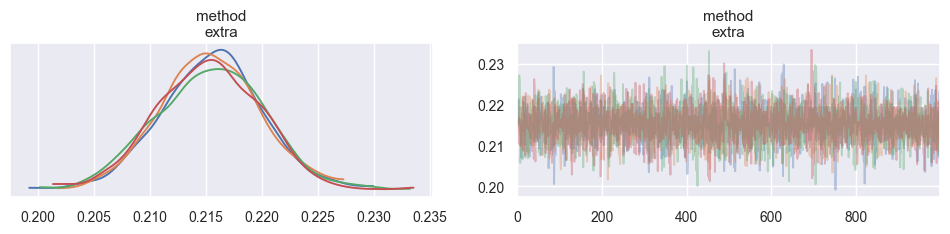

In [10]:
model_control, summary_control, az_summary_control = utils.stat_model(
    num_correct_df,
    treatment="extra",
    control="base",
    equation=equation,
    id_vars=id_vars,
)

In [11]:
print(model_control)

       Formula: p(num_correct, num_test) ~ method + lm_type + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 2000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
            lm_type ~ Normal(mu: 0.0, sigma: 5.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Treatment

In [12]:
summary_bias, summary_relative_bias = utils.eda(
    accuracy_df, treatment="test", control="extra"
)

Overall difference:
┌───────┬─────────┐
│ mean  ┆ se      │
╞═══════╪═════════╡
│ 0.002 ┆ 0.00295 │
└───────┴─────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.028789 ┆ 0.009276 │
└──────────┴──────────┘


In [13]:
summary_bias

dataset,mean,se
"""FRENK-hate-en""",-0.0046,0.006908
"""ag_news""",-0.0107,0.014752
"""amazon_counter…",0.03475,0.025371
"""app_reviews""",0.00025,0.018601
"""blog_authorshi…",0.0033,0.004504
…,…,…
"""silicone""",0.002,0.025635
"""trec""",-0.00815,0.019206
"""tweets_hate_sp…",-0.0363,0.034703
"""yahoo_answers_…",-0.0006,0.00436


In [14]:
summary_relative_bias

dataset,mean,se
"""FRENK-hate-en""",-0.006942,0.012228
"""ag_news""",-0.005835,0.030012
"""amazon_counter…",0.071811,0.04828
"""app_reviews""",0.053267,0.089104
"""blog_authorshi…",0.00705,0.008931
…,…,…
"""silicone""",0.046322,0.066735
"""trec""",0.01388,0.074606
"""tweets_hate_sp…",-0.04126,0.043392
"""yahoo_answers_…",0.01159,0.044044


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, lm_type, 1|dataset_sigma, 1|dataset_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 1161 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Sampling posterior predictive. This will take at least 30 min. Maybe 1 hrs for this size data


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
method[test],0.0105,0.0046,0.00334,0.0179,0.00005,0.00004,8064.95428,2794.74453,1.00222


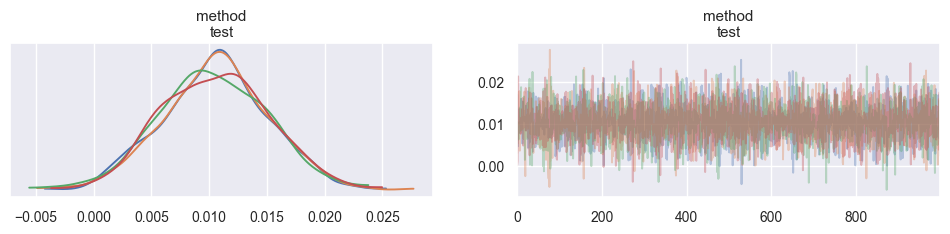

In [15]:
model_bias, summary_bias, az_summary_bias = utils.stat_model(
    num_correct_df,
    treatment="test",
    control="extra",
    equation=equation,
    id_vars=id_vars,
)

In [16]:
print(model_bias)

       Formula: p(num_correct, num_test) ~ method + lm_type + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 2000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
            lm_type ~ Normal(mu: 0.0, sigma: 5.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Write inference data

In [17]:
netcdfs = os.path.join("..", "..", "netcdfs", f"m{num_train}")
if not os.path.exists(netcdfs):
    os.mkdir(netcdfs)

In [18]:
summary_control.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_control.nc")
)

'../../netcdfs/m50/main_m50_n500_control.nc'

In [19]:
summary_bias.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_treatment.nc")
)

'../../netcdfs/m50/main_m50_n500_treatment.nc'